In [1]:
import yfinance as yf
import os
import pandas as pd
import numpy as np

In [2]:
btc_ticker = yf.Ticker("BTC-USD")

In [3]:
if os.path.exists("btc.csv"):
    btc = pd.read_csv("btc.csv", index_col=0)
else:
    btc = btc_ticker.history(period="max")
    

In [4]:
btc.index = pd.to_datetime(btc.index)

In [5]:
btc.columns = [c.lower() for c in btc.columns]

<Axes: xlabel='Date'>

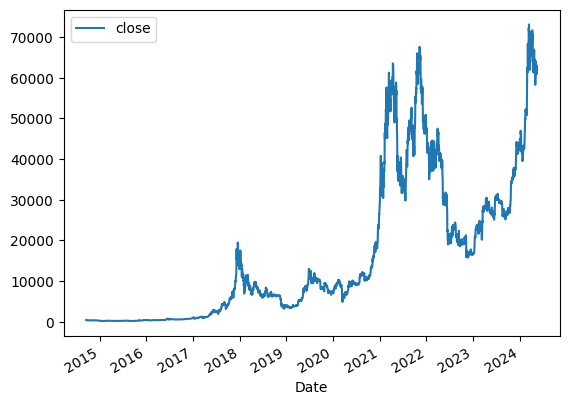

In [6]:
btc.plot.line(y="close", use_index=True)

In [7]:
btc.to_csv('btc.csv')

In [8]:
btc

,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-10 00:00:00+00:00,63055.191406,63446.742188,60208.781250,60792.777344,27804954694,0.0,0.0
2024-05-11 00:00:00+00:00,60793.355469,61451.152344,60492.625000,60793.710938,13842272968,0.0,0.0
2024-05-12 00:00:00+00:00,60793.503906,61818.156250,60632.601562,61448.394531,13800459405,0.0,0.0


In [9]:
btc = pd.read_csv('btc.csv')
btc['Date'] = pd.to_datetime(btc['Date']).dt.date

In [10]:
wiki = pd.read_csv("wikipedia_edits.csv", index_col=0, parse_dates=True)

In [11]:
wiki

,edit_count,sentiment,neg_sentiment
2009-04-06,0.133333,-0.018351,0.025000
2009-04-07,0.000000,0.000000,0.000000
2009-04-08,0.000000,0.000000,0.000000
2009-04-09,0.000000,0.000000,0.000000
2009-04-10,0.000000,0.000000,0.000000
...,...,...,...
2024-05-11,0.500000,-0.101909,0.150000
2024-05-12,0.500000,-0.101909,0.150000
2024-05-13,0.566667,-0.103063,0.166667
2024-05-14,0.566667,-0.103063,0.166667


In [12]:
df1 = pd.read_csv('btc.csv')
df2 = pd.read_csv('wikipedia_edits.csv')


print(df1.columns)
print(df2.columns)
df2 = df2.rename(columns={'Unnamed: 0': 'Date'})

# Convert the 'Date' column to datetime format in both DataFrames
df1['Date'] = pd.to_datetime(df1['Date'])
df2['Date'] = pd.to_datetime(df2['Date'])
df2['Date'] = df2['Date'].dt.tz_localize('UTC')


# Perform the merge operation using the 'Date' column as the merge key
cryptofile = df1.merge(df2, on='Date')






Index(['Date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'stock splits'],
      dtype='object')
Index(['Unnamed: 0', 'edit_count', 'sentiment', 'neg_sentiment'], dtype='object')


In [13]:
cryptofile

,Date,open,high,low,close,volume,dividends,stock splits,edit_count,sentiment,neg_sentiment
0,2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0,5.033333,-0.232191,0.532718
1,2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0,5.066667,-0.232759,0.532718
2,2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0,5.200000,-0.235415,0.549385
3,2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0,5.200000,-0.233185,0.549385
4,2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0,5.233333,-0.204017,0.532718
...,...,...,...,...,...,...,...,...,...,...,...
3523,2024-05-10 00:00:00+00:00,63055.191406,63446.742188,60208.781250,60792.777344,27804954694,0.0,0.0,0.566667,-0.129409,0.183333
3524,2024-05-11 00:00:00+00:00,60793.355469,61451.152344,60492.625000,60793.710938,13842272968,0.0,0.0,0.500000,-0.101909,0.150000
3525,2024-05-12 00:00:00+00:00,60793.503906,61818.156250,60632.601562,61448.394531,13800459405,0.0,0.0,0.500000,-0.101909,0.150000
3526,2024-05-13 00:00:00+00:00,61451.218750,63422.660156,60769.839844,62901.449219,27889181179,0.0,0.0,0.566667,-0.103063,0.166667


In [14]:
cryptofile.to_csv('crypto_data.csv')

In [15]:
cryptofile["tomorrow"] = cryptofile["close"].shift(-1)

In [16]:
cryptofile["target"] = (cryptofile["tomorrow"] > cryptofile["close"]).astype(int)

In [17]:
cryptofile["target"].value_counts()

target
1    1870
0    1658
Name: count, dtype: int64

In [18]:
from sklearn.ensemble import RandomForestClassifier

cryptofile = pd.read_csv('crypto_data.csv')

cryptofile['target'] = np.where(cryptofile['close'] > cryptofile['open'], 1, 0)



train = cryptofile.iloc[:-200]
test = cryptofile.iloc[-200:]

predictors = ["close", "volume", "open", "high", "low", "edit_count", "sentiment", "neg_sentiment"]
model = RandomForestClassifier(n_estimators=100, min_samples_split=50, random_state=1)
model.fit(train[predictors], train["target"])

RandomForestClassifier(min_samples_split=50, random_state=1)

In [19]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["target"], preds)

0.6065573770491803

In [20]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [21]:
def backtest(data, model, predictors, start=1095, step=150):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [22]:
from xgboost import XGBClassifier

model = XGBClassifier(random_state=1, learning_rate=.1, n_estimators=200)
predictions = backtest(cryptofile, model, predictors)

In [23]:
predictions["predictions"].value_counts()

predictions
1    1580
0     853
Name: count, dtype: int64

In [24]:
precision_score(predictions["target"], predictions["predictions"])

0.6215189873417721

In [25]:
def compute_rolling(cryptofile):
    horizons = [2,7,60,365]
    new_predictors = ["close", "sentiment", "neg_sentiment"]

    for horizon in horizons:
        rolling_averages = cryptofile.rolling(horizon, min_periods=1).mean()

        ratio_column = f"close_ratio_{horizon}"
        cryptofile[ratio_column] = btc["close"] / rolling_averages["close"]
        
        edit_column = f"edit_{horizon}"
        cryptofile[edit_column] = rolling_averages["edit_count"]

        rolling = cryptofile.rolling(horizon, closed='left', min_periods=1).mean()
        trend_column = f"trend_{horizon}"
        cryptofile[trend_column] = rolling["target"]

        new_predictors+= [ratio_column, trend_column, edit_column]
    return cryptofile, new_predictors

In [26]:
precision_score(predictions["target"], predictions["predictions"])

0.6215189873417721

In [27]:
predictions

,target,predictions
1095,0,0
1096,0,1
1097,1,1
1098,0,1
1099,0,1
...,...,...
3523,0,0
3524,1,1
3525,1,1
3526,1,1
